## **File: usage_naming.ipynb**
Description: producing necessary plots to <br> 
rename the usages to major cell types. Final <br>
functions are presented in cnmf_plotting_utils.py

### **Imports**

In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

### **Import Datasets**

In [2]:
immun_excl = sc.read_h5ad("/home/james/data/immune_exclusion_data/ds_outer_combined_all4_dat.h5ad")

In [4]:
immun_excl_usages = sc.read_h5ad("/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf_k25_dt0_05.h5ad")

In [5]:
print(immun_excl)
print(immun_excl_usages)

AnnData object with n_obs × n_vars = 26136 × 15785
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'SampleId', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'celltype_each', 'celltype_annotation', 'exp_num', 'active_ident', 'Cell_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'IES', 'CD8T_core9', 'CD8T_cytokine', 'Major_cell_type', 'leiden', 'session_id', 'IES_status', 'scIES_status', 'IES_norm', 'Tumor_Type', 'Vantage_ID'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'mean', 'std'
    uns: 'Cell_Type_colors', 'Tumor_Type_colors', 'exp_num_colors', 'leiden_dge', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsin'
    obsp: 'connectivities', 'distances'
AnnData object with n_obs × n_vars = 261

/home/james/anaconda3/envs/rot_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


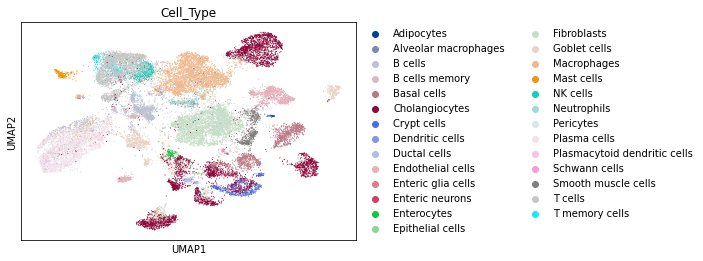

In [15]:
### Map cell types for naming
sc.pl.umap(
    immun_excl,
    color = ["Cell_Type"]
    )

### **Making functions to plot cell types individually**

/home/james/anaconda3/envs/rot_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


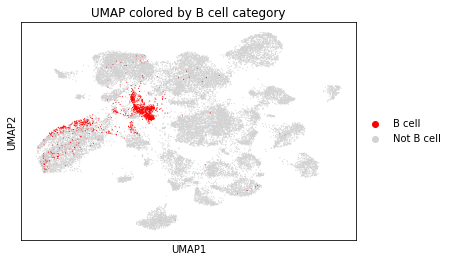

In [26]:
def plot_b_cells_on_umap(adata, color_palette=['red', 'lightgray']):
    """Adds a categorical 'B_cell_category' column and plots a UMAP colored by it.

    Args:
        adata: The AnnData object.
        color_palette: A list of two colors for 'B cell'/'Not B cell' (default: ['red', 'lightgray']).
    """
    try:
        # Create the categorical column
        adata.obs['B cells'] = adata.obs['Cell_Type'].str.strip().apply(lambda x: 'B cell' if x == 'B cells' else 'Not B cell')

        # Plot the UMAP, specifying the categorical variable and color palette
        sc.pl.umap(adata, color=['B cells'], palette=color_palette, title="UMAP colored by B cell category")

    except KeyError:
        print("Error: 'Cell_Type' column not found in AnnData object.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# Example usage:
plot_b_cells_on_umap(immun_excl)
#plot_b_cells_on_umap(immun_excl, color_palette=['blue', 'lightblue'])

In [49]:
### This function uses scanpy but not well
'''
def plot_all_celltypes_on_umap(adata, ncols=6, output_filename="combined_umap_plot.png", figsize=(16, 12), dpi=300):
    """Generates a combined UMAP plot for all unique cell types and saves it as a single image.

    Args:
        adata: The AnnData object.
        ncols: Number of columns in the subplot grid.
        output_filename: Filename to save the combined plot (default: "combined_umap_plot.png").
        figsize: Tuple specifying overall figure width and height in inches (default: (16, 12)).
        dpi: Resolution in dots per inch (DPI) (default: 300).
    """
    unique_cell_types = adata.obs['Cell_Type'].unique()
    nrows = (len(unique_cell_types) + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, dpi=dpi, facecolor = "white")
    axes = axes.ravel()

    for i, cell_type in enumerate(unique_cell_types):
        adata.obs[f'{cell_type}_category'] = adata.obs['Cell_Type'].str.strip().apply(lambda x: cell_type if x == cell_type else 'Not ' + cell_type)
        sc.pl.umap(adata, color=[f'{cell_type}_category'], ax=axes[i], show=False, title=cell_type, palette=['red', 'lightgray'])
        del adata.obs[f'{cell_type}_category']

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(output_filename, dpi=dpi) #Save the combined figure.
    plt.show()
    plt.close(fig) #Close the figure

# Example usage:
plot_all_celltypes_on_umap(immun_excl, ncols=6, output_filename="my_combined_umap.png", figsize=(40,20))
'''

'\ndef plot_all_celltypes_on_umap(adata, ncols=6, output_filename="combined_umap_plot.png", figsize=(16, 12), dpi=300):\n    """Generates a combined UMAP plot for all unique cell types and saves it as a single image.\n\n    Args:\n        adata: The AnnData object.\n        ncols: Number of columns in the subplot grid.\n        output_filename: Filename to save the combined plot (default: "combined_umap_plot.png").\n        figsize: Tuple specifying overall figure width and height in inches (default: (16, 12)).\n        dpi: Resolution in dots per inch (DPI) (default: 300).\n    """\n    unique_cell_types = adata.obs[\'Cell_Type\'].unique()\n    nrows = (len(unique_cell_types) + ncols - 1) // ncols\n\n    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, dpi=dpi, facecolor = "white")\n    axes = axes.ravel()\n\n    for i, cell_type in enumerate(unique_cell_types):\n        adata.obs[f\'{cell_type}_category\'] = adata.obs[\'Cell_Type\'].str.strip().apply(lambda x: cell_type if x =

In [50]:
### Successful plot used to rename usages
def plot_all_celltypes_on_umap(adata, ncols=6, output_filename="combined_umap_plot.png", figsize=(40, 20), dpi=300, point_size=10):
    """Generates a combined UMAP plot, with adjustable point size, for all unique cell types.

    Args:
        adata: The AnnData object.
        ncols: Number of columns in the subplot grid.
        output_filename: Filename to save the combined plot.
        figsize: Overall figure dimensions.
        dpi: Resolution in dots per inch.
        point_size: Size of the points in the scatter plot (adjust for visual matching).
    """
    unique_cell_types = adata.obs['Cell_Type'].unique()
    nrows = (len(unique_cell_types) + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, dpi=dpi, facecolor="white")
    axes = axes.ravel()

    for i, cell_type in enumerate(unique_cell_types):
        color_vector = np.where(adata.obs['Cell_Type'].str.strip() == cell_type, 'red', 'lightgray')
        x = adata.obsm['X_umap'][:, 0]
        y = adata.obsm['X_umap'][:, 1]

        axes[i].scatter(x, y, c=color_vector, s=point_size, cmap=None)  #Use point_size here.
        axes[i].set_title(cell_type)
        axes[i].set_xlabel("UMAP1")
        axes[i].set_ylabel("UMAP2")
        axes[i].set_xticks([]) #Remove tick marks for cleaner look
        axes[i].set_yticks([])

    for ax in axes[len(unique_cell_types):]:
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(output_filename, dpi=dpi)
    plt.show()
    plt.close(fig)

# Example usage (experiment with point_size):
plot_all_celltypes_on_umap(immun_excl, ncols=6, output_filename="/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf_ind_cell_types_umaps.png", figsize=(30, 20), point_size=0.5) #Try different point sizes here.

### **Rename dictionary hand made**

In [22]:
rename_dict = {
    "usage_1":"Basal_cells",
    "usage_2":"T_cells_&_T_memory",
    "usage_3":"Fibroblast_1",
    "usage_4":"Adipocytes",
    "usage_5":"Endothelial_cells_1",
    "usage_6":"Cholangiocytes_1_&_Goblet",
    "usage_7":"Plasma_cells",
    "usage_8":"Macrophages_1",
    "usage_9":"Mast_cells",
    "usage_10":"Cholangiocytes_2",
    "usage_11":"TMCT", ## TMCT = TOO MANY CELL TYPES
    "usage_12":"Smooth_Muscle_Cells_1",
    "usage_13":"TMCT",
    "usage_14":"Smooth_Muscle_Cells_2",
    "usage_15":"Not_Specific",
    "usage_16":"Fibroblast_2",
    "usage_17":"Neutrophils",
    "usage_18":"Macropages_2",
    "usage_19":"T_&_NK_cells",
    "usage_20":"Fibroblast_3",
    "usage_21":"B_cell",
    "usage_22":"Goblet_cells",
    "usage_23":"Endothelial_cells_2",
    "usage_24":"Macrophages_3",
    "usage_25":"Fibroblast_4",
    }

### **Spectra plots with usage names**

In [55]:
def plot_spectra_scores(spectra_file, output_filename="spectra_score_plot.png", fig_rows=6, fig_cols=5, save_plot=True, fig_height = 24, fig_width = 18):
    """Plots the top 22 genes and their scores for each usage in a spectra file.

    Args:
        spectra_file (str): Path to the spectra file.
        output_filename (str, optional): Filename for the saved plot. Defaults to "spectra_score_plot.png".
        fig_rows (int, optional): Number of rows in the plot grid. Defaults to 6.
        fig_cols (int, optional): Number of columns in the plot grid. Defaults to 5.
        save_plot (bool, optional): Whether to save the plot to a file. Defaults to True.
    """
    
    # Load the text file into a pandas DataFrame
    df = pd.read_csv(spectra_file, sep="\t", index_col=0)  # Replace "your_file.txt" with your file name
    df = df.transpose()

    # Get the number of replicates
    num_replicates = len(df.columns)

    # Create a 6x5 grid of subplots
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(fig_width, fig_height))  # Adjust figsize as needed

    # Iterate over each replicate and plot on the corresponding subplot
    for i in range(num_replicates):
        # Get the data for the current replicate
        replicate_data = df.iloc[:, i]

        # Get the top 22 genes
        top_genes = replicate_data.nlargest(22).index  # Get the top 22 genes
        top_scores = replicate_data.nlargest(22).values  # Get the scores

        # Sort the top scores in ascending order
        sorted_indices = top_scores.argsort()  # Get the indices for sorting
        top_genes = top_genes[sorted_indices]  # Reorder genes based on sorted indices
        top_scores = top_scores[sorted_indices]  # Reorder scores based on sorted indices

        # Plot the gene names at their corresponding scores on the correct subplot
        ax = axes[i // fig_cols, i % fig_cols]  # Get the correct subplot based on the index i
        for j in range(len(top_genes)):
            ax.text(
                top_scores[j],
                j,
                top_genes[j],
                ha='right',
                va='center'
                )

        ax.set_title(f"usage_{i+1}")
        ax.set_ylim(-1, len(top_genes))  # Adjust y-axis limits as needed
        #ax.set_xlim(min(top_scores)/1.5, max(top_scores))

        x_min_percentage = 0.28
        x_min = min(top_scores) - (max(top_scores) - min(top_scores)) * x_min_percentage
        ax.set_xlim(x_min, max(top_scores) + 0.00003)
        
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

        ax.set_yticks([])
        ax.set_yticklabels([])

    # Adjust the spacing between subplots
    plt.tight_layout()

    fig.set_facecolor('white')

    if save_plot:
        plt.savefig(output_filename, dpi=800)
    plt.show()

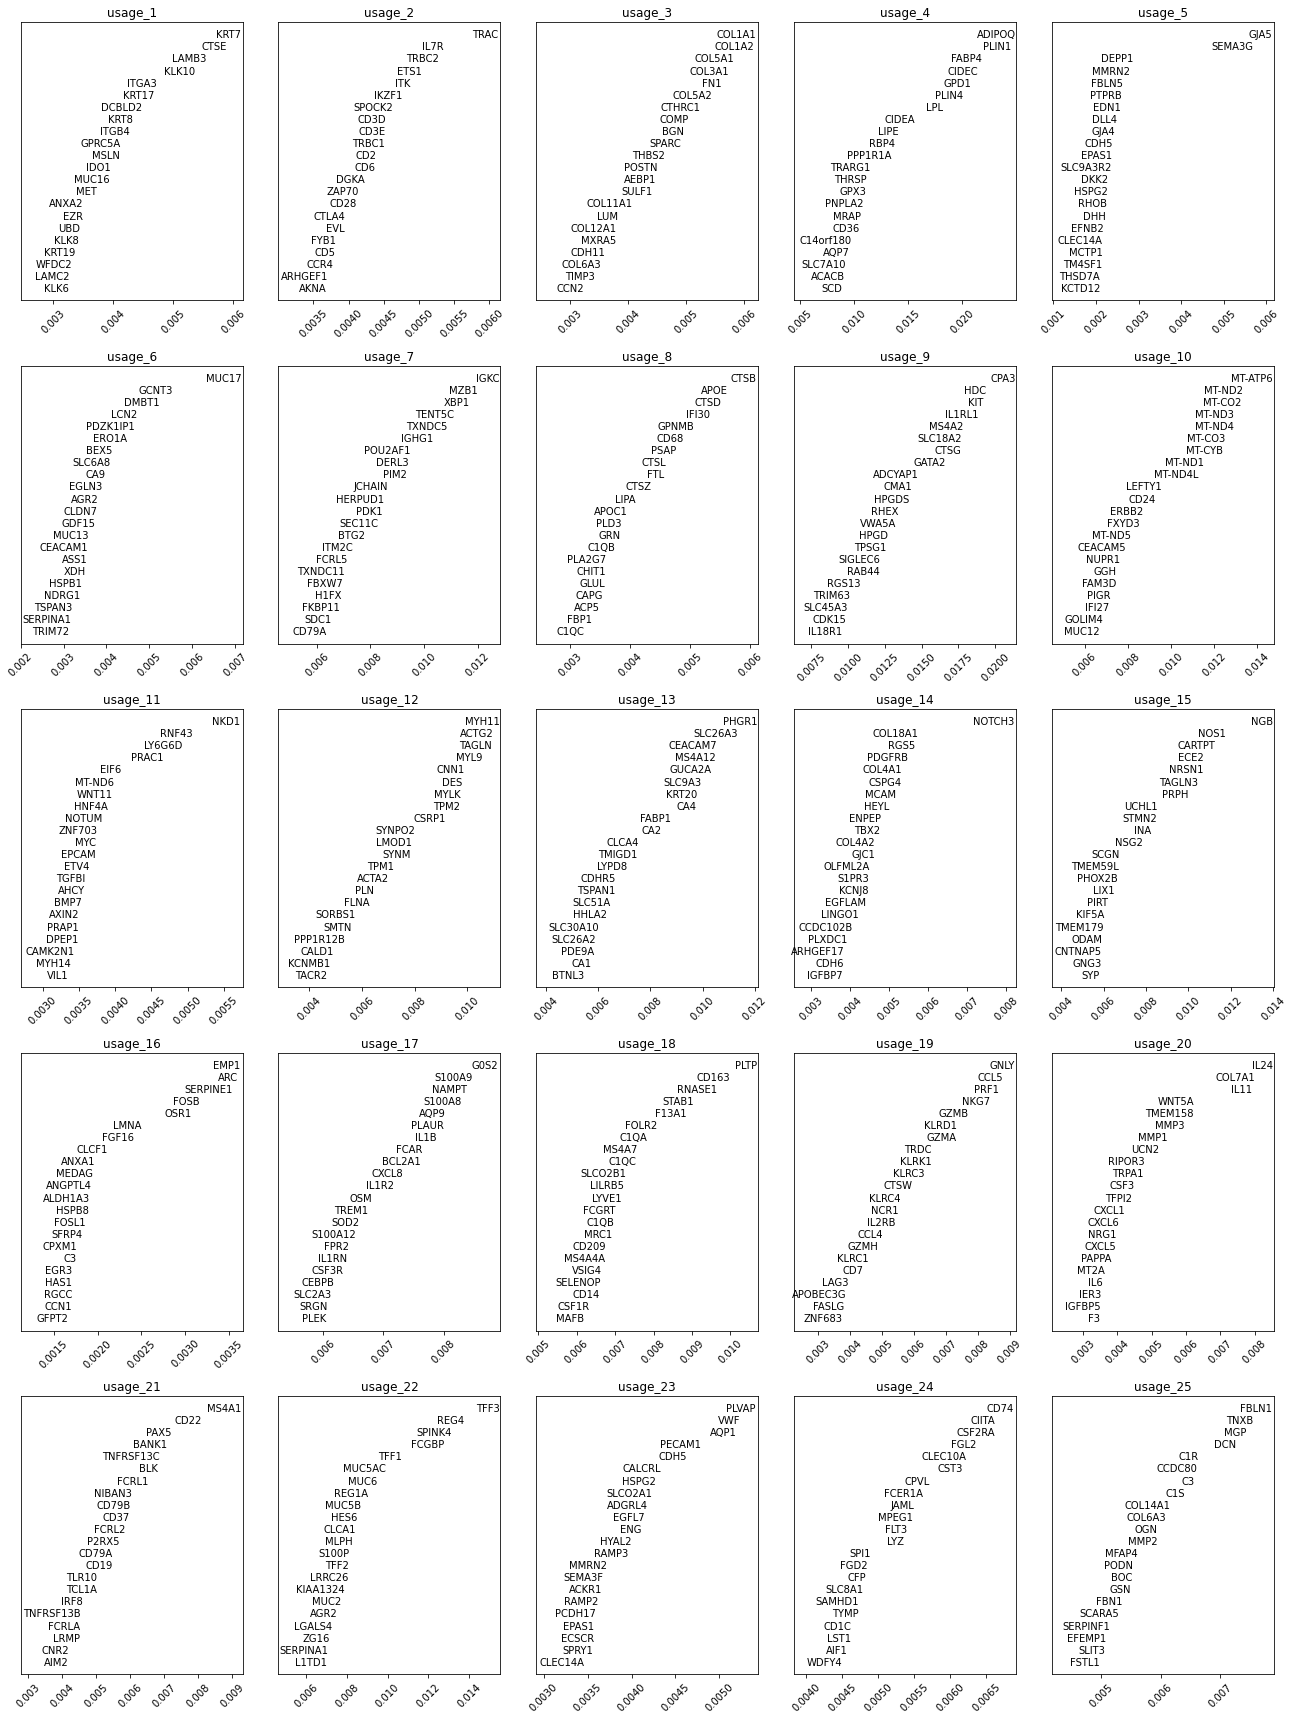

In [56]:
plot_spectra_scores(
    spectra_file = "/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf.gene_spectra_score.k_25.dt_0_05.txt",
    output_filename = "/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf_k25_gene_spectra_score_plot.png",
    fig_rows = 5,
    fig_cols = 5
    )

## Making spectra file containing cell type names

In [25]:
df = pd.read_csv("/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf.gene_spectra_score.k_25.dt_0_05.txt", sep="\t", index_col=0)
df.head(10)
df.index
df.index = df.index.map(lambda x: f"usage_{x}")
df.head()
df = df.rename(index = rename_dict)
df.head()
df.to_csv("/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf.gene_spectra_score_cell_type_usages.k_25.dt.txt", index=True, header=True, sep="\t")

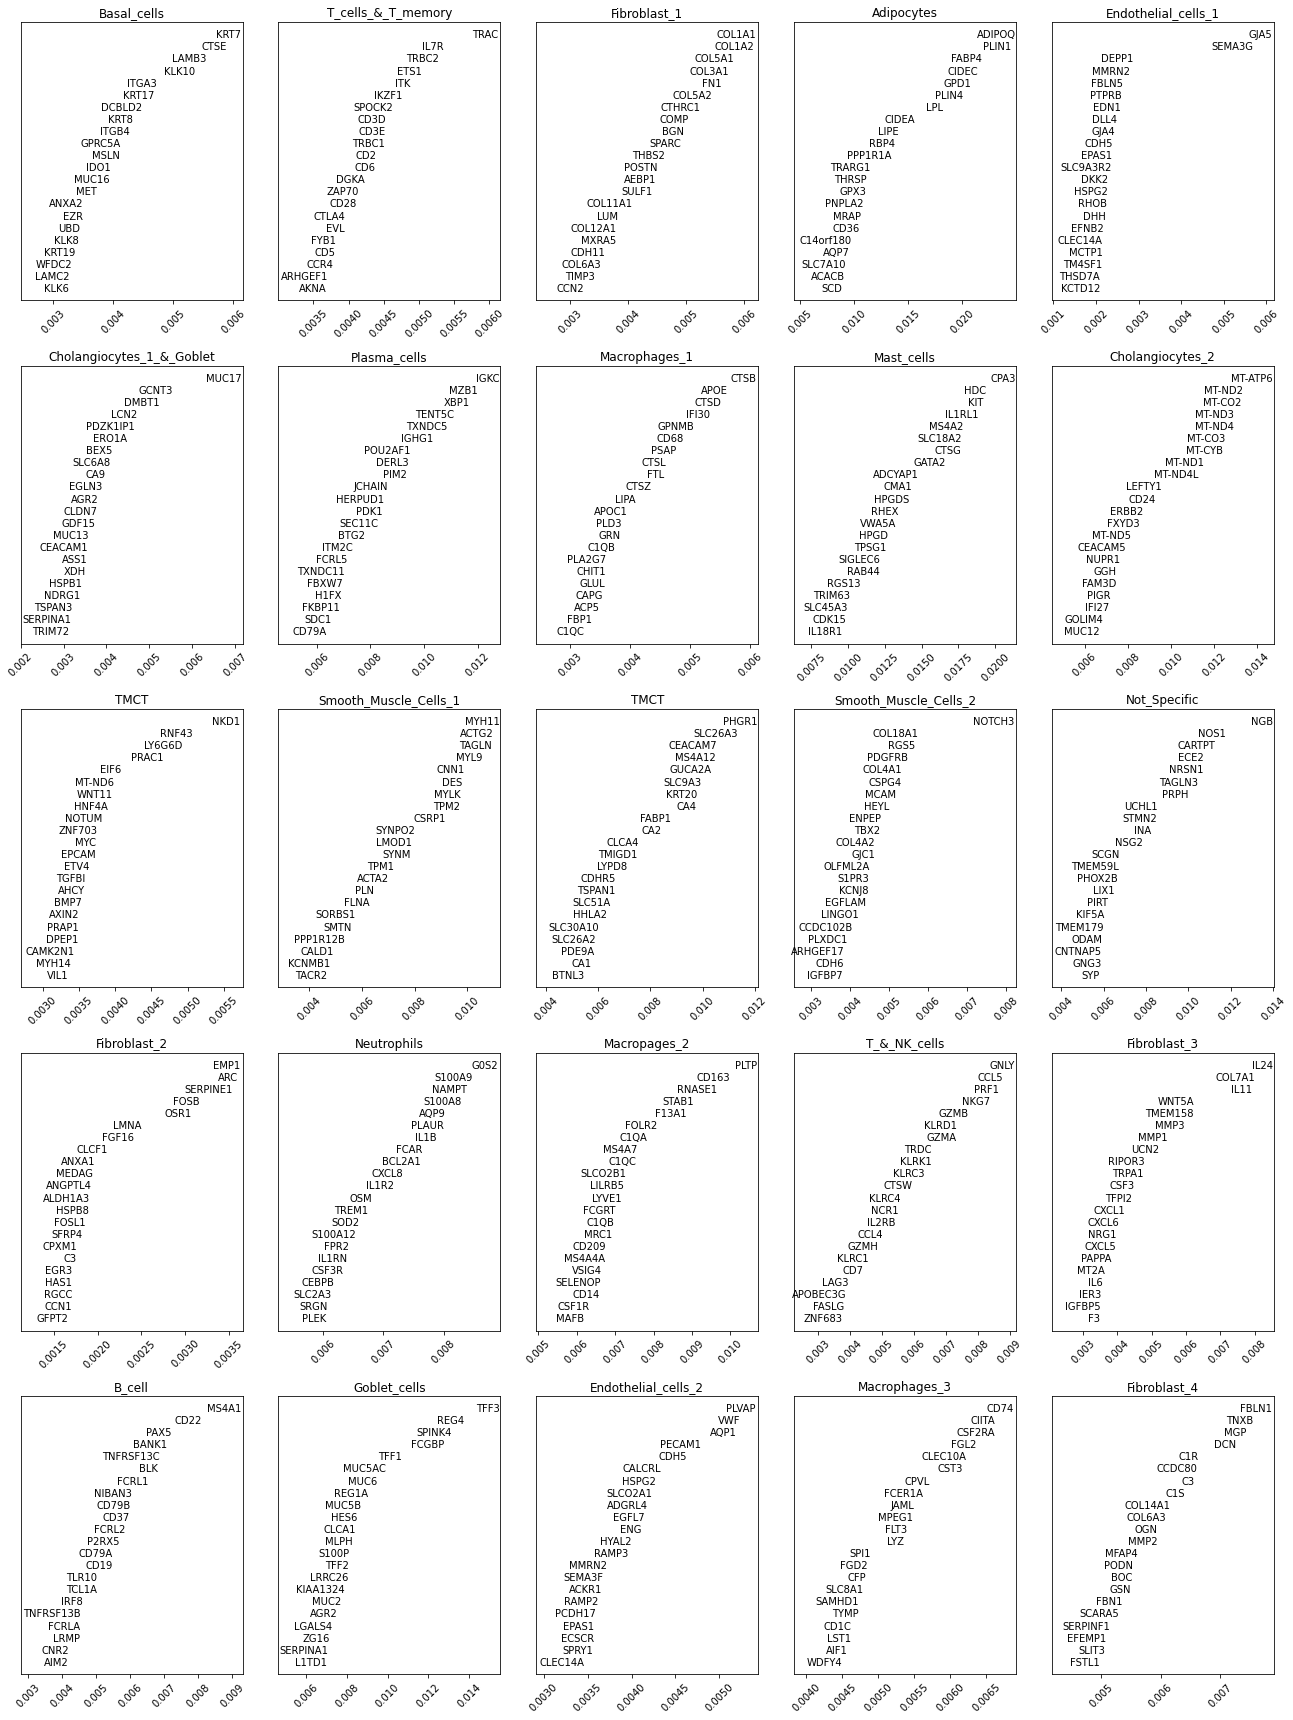

In [71]:
def plot_spectra_scores(spectra_file, output_filename="spectra_score_plot.png", fig_rows=5, fig_cols=5, save_plot=True, fig_height = 24, fig_width = 18, rename_dict=None):
    """Plots the top 22 genes and their scores for each usage in a spectra file, with optional renaming.

    Args:
        spectra_file (str): Path to the spectra file.
        output_filename (str, optional): Filename for the saved plot. Defaults to "spectra_score_plot.png".
        fig_rows (int, optional): Number of rows in the plot grid. Defaults to 6.
        fig_cols (int, optional): Number of columns in the plot grid. Defaults to 5.
        save_plot (bool, optional): Whether to save the plot to a file. Defaults to True.
        rename_dict (dict, optional): A dictionary mapping "usage_i" to new names. Defaults to None.
    """
    
    # Load the text file into a pandas DataFrame
    df = pd.read_csv(spectra_file, sep="\t", index_col=0)  # Replace "your_file.txt" with your file name
    df = df.transpose()

    # Get the number of replicates
    num_replicates = len(df.columns)

    # Create a 6x5 grid of subplots
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(fig_width, fig_height))  # Adjust figsize as needed

    # Iterate over each replicate and plot on the corresponding subplot
    for i in range(num_replicates):
        # Get the data for the current replicate
        replicate_data = df.iloc[:, i]

        # Get the top 22 genes
        top_genes = replicate_data.nlargest(22).index  # Get the top 22 genes
        top_scores = replicate_data.nlargest(22).values  # Get the scores

        # Sort the top scores in ascending order
        sorted_indices = top_scores.argsort()  # Get the indices for sorting
        top_genes = top_genes[sorted_indices]  # Reorder genes based on sorted indices
        top_scores = top_scores[sorted_indices]  # Reorder scores based on sorted indices

        # Plot the gene names at their corresponding scores on the correct subplot
        ax = axes[i // fig_cols, i % fig_cols]  # Get the correct subplot based on the index i
        for j in range(len(top_genes)):
            ax.text(
                top_scores[j],
                j,
                top_genes[j],
                ha='right',
                va='center'
                )

        usage_key = f"usage_{i+1}"
        title = rename_dict.get(usage_key, usage_key) # Use renamed title if available, otherwise use original

        ax.set_title(title)
        ax.set_ylim(-1, len(top_genes))  # Adjust y-axis limits as needed

        x_min_percentage = 0.28
        x_min = min(top_scores) - (max(top_scores) - min(top_scores)) * x_min_percentage
        ax.set_xlim(x_min, max(top_scores) + 0.00003)
        
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

        ax.set_yticks([])
        ax.set_yticklabels([])

    # Adjust the spacing between subplots
    plt.tight_layout()

    fig.set_facecolor('white')

    if save_plot:
        plt.savefig(output_filename, dpi=800)
    plt.show()


rename_dict = {
    "usage_1":"Basal_cells",
    "usage_2":"T_cells_&_T_memory",
    "usage_3":"Fibroblast_1",
    "usage_4":"Adipocytes",
    "usage_5":"Endothelial_cells_1",
    "usage_6":"Cholangiocytes_1_&_Goblet",
    "usage_7":"Plasma_cells",
    "usage_8":"Macrophages_1",
    "usage_9":"Mast_cells",
    "usage_10":"Cholangiocytes_2",
    "usage_11":"TMCT", ## TMCT = TOO MANY CELL TYPES
    "usage_12":"Smooth_Muscle_Cells_1",
    "usage_13":"TMCT",
    "usage_14":"Smooth_Muscle_Cells_2",
    "usage_15":"Not_Specific",
    "usage_16":"Fibroblast_2",
    "usage_17":"Neutrophils",
    "usage_18":"Macropages_2",
    "usage_19":"T_&_NK_cells",
    "usage_20":"Fibroblast_3",
    "usage_21":"B_cell",
    "usage_22":"Goblet_cells",
    "usage_23":"Endothelial_cells_2",
    "usage_24":"Macrophages_3",
    "usage_25":"Fibroblast_4",
    }

# Example usage:
plot_spectra_scores("/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf.gene_spectra_score.k_25.dt_0_05.txt", rename_dict=rename_dict) # Replace "your_spectra_file.txt" with your file

In [69]:
pd.read_csv("/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf.gene_spectra_score.k_25.dt_0_05.txt", delimiter="\t", header = 0)

Unnamed: 0          A1CF       A2M   A3GALT2    A4GALT      AAAS  \
0            1 -1.670394e-04 -0.000330 -0.000048 -0.000113 -0.000086   
1            2 -2.437336e-04 -0.000785 -0.000100 -0.000285  0.000047   
2            3 -7.606053e-05 -0.000039  0.000008  0.000508 -0.000179   
3            4 -1.714119e-05 -0.000392  0.000041 -0.000027 -0.000036   
4            5 -2.339326e-05  0.001089 -0.000028  0.000116 -0.000018   
5            6  1.642836e-04 -0.000526 -0.000055 -0.000277 -0.000004   
6            7 -4.493998e-04 -0.001499 -0.000110 -0.000791 -0.000397   
7            8 -7.840227e-05  0.000619 -0.000022 -0.000116 -0.000006   
8            9 -7.380542e-05 -0.000423 -0.000071 -0.000253 -0.000039   
9           10  7.319864e-04 -0.000840 -0.000094 -0.000421 -0.000302   
10          11  6.796522e-04 -0.000846 -0.000073 -0.000391  0.000205   
11          12 -1.147691e-04  0.000543  0.000040  0.000312  0.000282   
12          13  1.184522e-03 -0.000119 -0.000037 -0.000077 -0.000219   
13          14 -4.467751e-05  0.002482  0.000072  0.000430 -0.000018   
14          15 -6.824478e-07 -0.000127  0.000011  0.000121  0.000112   
15          16 -1.665299e-05 -0.000650 -0.000021 -0.000183 -0.000062   
16          17 -8.504601e-05 -0.000790  0.000330 -0.000194 -0.000406   
17          18 -6.710820e-05  0.000702  0.000265 -0.000271 -0.000055   
18          19 -1.141561e-04 -0.000519  0.000152 -0.000257 -0.000105   
19          20 -9.814512e-05  0.000324  0.000028  0.001610  0.000001   
20          21 -9.298475e-05 -0.000589  0.000006  0.000191  0.000206   
21          22  3.579186e-04 -0.000721 -0.000100 -0.000404  0.000145   
22          23 -6.912312e-05  0.002124 -0.000012  0.000881 -0.000096   
23          24 -2.026914e-04 -0.000267 -0.000065 -0.000259  0.000500   
24          25 -1.247166e-04  0.002741  0.000034  0.000975  0.000077   

            AACS     AADAC   AADACL2     AADAT  ...      ZW10    ZWILCH  \
0   5.205451e-05  0.000022  0.000016  0.000154  ...  0.000023  0.000033   
1  -2.520043e-04 -0.000068  0.000043 -0.000211  ...  0.000095  0.000058   
2  -1.155988e-04 -0.000198 -0.000046  0.000005  ... -0.000129 -0.000101   
3   6.529582e-04  0.000388 -0.000067 -0.000014  ... -0.000034 -0.000065   
4  -6.608591e-05 -0.000021 -0.000024 -0.000105  ...  0.000018  0.000001   
5   3.473650e-04 -0.000018 -0.000019  0.000460  ...  0.000472  0.000122   
6  -4.398027e-05 -0.000177 -0.000089 -0.000629  ... -0.000435 -0.000595   
7  -1.737712e-04  0.000026 -0.000028 -0.000073  ... -0.000033 -0.000019   
8  -5.521369e-05 -0.000107 -0.000030 -0.000144  ... -0.000089 -0.000183   
9   2.575110e-04 -0.000048 -0.000042 -0.000030  ... -0.000046  0.000270   
10  4.978106e-04  0.000038 -0.000053  0.000386  ...  0.000293  0.000087   
11 -8.983442e-05  0.000007 -0.000053  0.000176  ... -0.000046 -0.000088   
12 -2.277596e-04  0.000482 -0.000008 -0.000171  ...  0.000001 -0.000165   
13 -9.480520e-06 -0.000054  0.000093  0.000147  ... -0.000011  0.000003   
14  4.117196e-05  0.000001 -0.000005  0.000065  ... -0.000056 -0.000035   
15  4.889868e-07  0.000283 -0.000106 -0.000027  ... -0.000056 -0.000019   
16 -2.309924e-04 -0.000092 -0.000019 -0.000122  ... -0.000188 -0.000133   
17 -3.989201e-04 -0.000044  0.000046 -0.000216  ... -0.000123 -0.000026   
18  3.874503e-05 -0.000057  0.000097 -0.000151  ... -0.000056  0.000227   
19  7.028985e-05  0.000339 -0.000048 -0.000027  ... -0.000016 -0.000045   
20 -2.373093e-04  0.000060 -0.000002 -0.000279  ... -0.000089  0.000085   
21  1.255339e-03  0.000099 -0.000063  0.000238  ...  0.000132  0.000097   
22 -1.514129e-04  0.000030 -0.000019 -0.000098  ...  0.000088  0.000033   
23 -1.958232e-04 -0.000078 -0.000063 -0.000179  ... -0.000043 -0.000062   
24 -9.442669e-05  0.000093  0.000390  0.000224  ... -0.000028 -0.000152   

           ZWINT      ZXDA      ZXDB      ZXDC    ZYG11A        ZYG11B  \
0   4.832053e-07 -0.000061  0.000058 -0.000080 -0.000052 -1.000397e-04   
1  -3.195816e-04  0.000212  0.00

In [63]:
nmf_immu_excl = sc.read_h5ad('/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf_k25_dt0_05.h5ad')
nmf_immu_excl

AnnData object with n_obs × n_vars = 26136 × 15785
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'SampleId', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'celltype_each', 'celltype_annotation', 'exp_num', 'active_ident', 'Cell_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'IES', 'CD8T_core9', 'CD8T_cytokine', 'Major_cell_type', 'leiden', 'session_id', 'IES_status', 'scIES_status', 'IES_norm', 'Tumor_Type', 'Vantage_ID', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'usage_5', 'usage_6', 'usage_7', 'usage_8', 'usage_9', 'usage_10', 'usage_11', 'usage_12', 'usage_13', 'usage_14', 'usage_15', 'usage_16', 'usage_17', 'usage_18', 'usage_19', 'usage_20', 'usage_21', 'usage_22', 'usage_23', 'usage_24', 'usage_25'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_coun